In [15]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels as sm

# ESERCIZIO 0

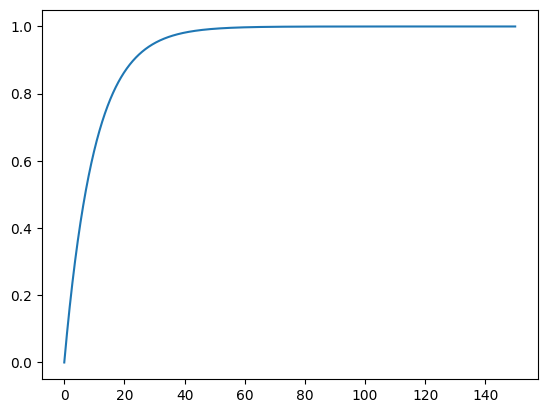

In [4]:
dist=st.expon(scale=1/0.1)
x=np.arange(0,150,0.1)
plt.plot(x,dist.cdf(x))
plt.show()

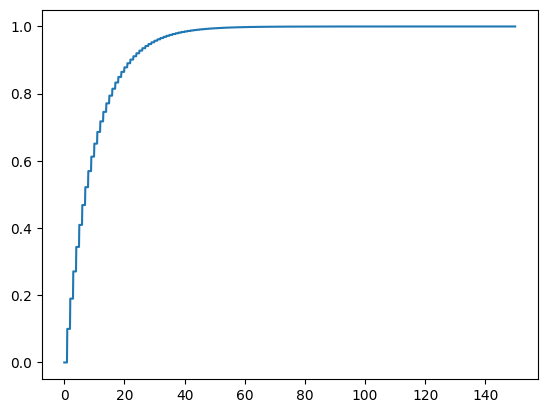

In [5]:
dist=st.geom(0.1)
plt.plot(x,dist.cdf(x))
plt.show()

# ESERCIZIO 1

In [6]:
df=pd.read_csv('astici.csv',sep=',',decimal='.')
df

,kg.di.pesce,settore.di.pesca,forza.del.mare,peso.astice
0,0.020205,B,9,29.9
1,0.300007,G,9,29.3
2,1.779424,B,9,29.9
3,0.935345,E,7,29.9
4,0.450751,B,8,28.4
...,...,...,...,...
276,0.403444,B,1,8.6
277,2.703744,A,0,5.9
278,4.308614,B,0,3.8
279,4.353504,B,0,2.6


#### DOMANDA 1

In [7]:
len(df)

281

#### DOMANDA 2

In [8]:
len(df['settore.di.pesca'].unique())

9

#### DOMANDA 3

In [9]:
len(df[df['settore.di.pesca']=='A'])

37

#### DOMANDA 4

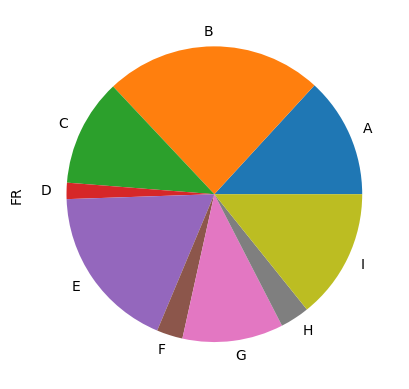

In [10]:
ct=pd.crosstab(index=df['settore.di.pesca'],columns=['FR'],normalize=True)
ct.plot.pie(subplots=True,legend=False)
plt.show()

In [11]:
ct

col_0,FR
settore.di.pesca,
A,0.131673
B,0.238434
C,0.117438
D,0.017794
E,0.181495
F,0.028470
G,0.110320
H,0.032028
I,0.142349


#### DOMANDA 5 - 6

Il settore con il maggior numero di astici trovato, come si evince dal grafico è il settore B che copre un 24% degli astici trovati

#### DOMANDA 7 - 8

In [12]:
df['forza.del.mare']

0      9
1      9
2      9
3      7
4      8
      ..
276    1
277    0
278    0
279    0
280    0
Name: forza.del.mare, Length: 281, dtype: int64

Possiamo dire che forza del mare è un carattere discreto 

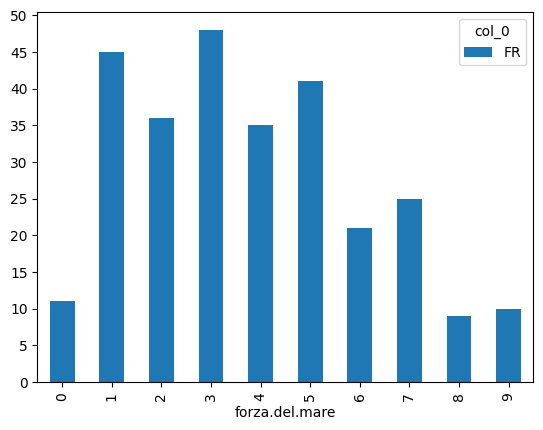

In [13]:
ctfdm=pd.crosstab(index=df['forza.del.mare'],columns=['FR'])
yticks=np.arange(0,55,5)
ctfdm.plot.bar()
plt.yticks(yticks)
plt.show()

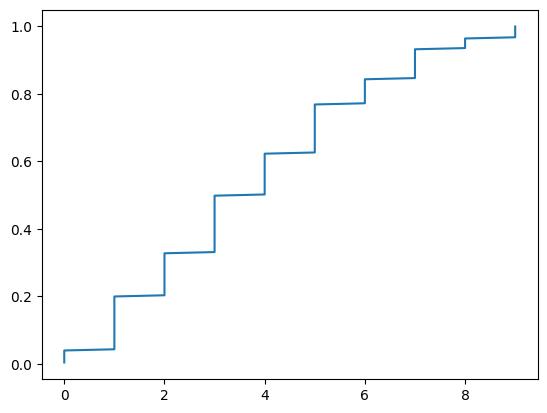

In [27]:
fdm=df['forza.del.mare']
ecdf=sm.distributions.ECDF(fdm.dropna())
plt.plot(ecdf.x,ecdf.y)
plt.show()

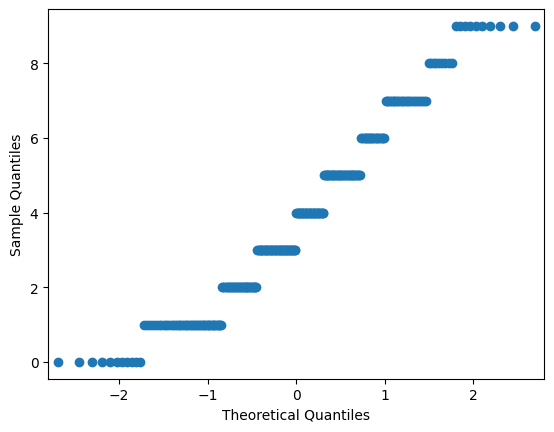

In [30]:
sm.api.qqplot(fdm,dist=st.norm())
plt.show()

Forza del mare è un attirbuto discreto e quindi non possiamo dire che è distribuita con una normale dal momento che la distribuzione normale modella sul continuo

In [31]:
fdm.mean()

3.804270462633452

In [32]:
fdm.value_counts()

forza.del.mare
3    48
1    45
5    41
2    36
4    35
7    25
6    21
0    11
9    10
8     9
Name: count, dtype: int64

In [34]:
astici=df['peso.astice']
astici

0      29.9
1      29.3
2      29.9
3      29.9
4      28.4
       ... 
276     8.6
277     5.9
278     3.8
279     2.6
280     0.5
Name: peso.astice, Length: 281, dtype: float64

Carattere continuo

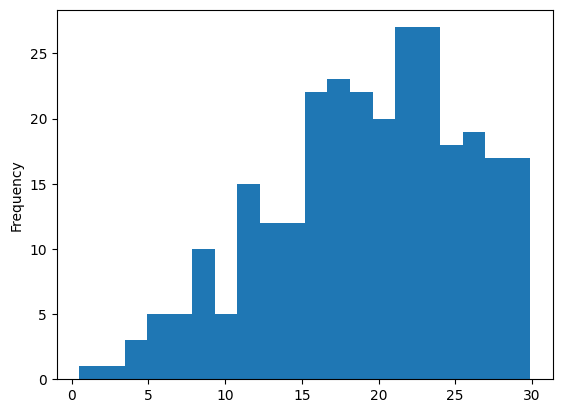

In [37]:
astici.plot.hist(bins=20)
plt.show()

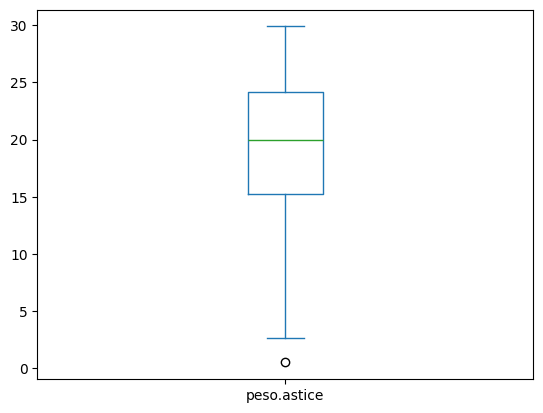

In [55]:
astici.plot.box()
plt.show()

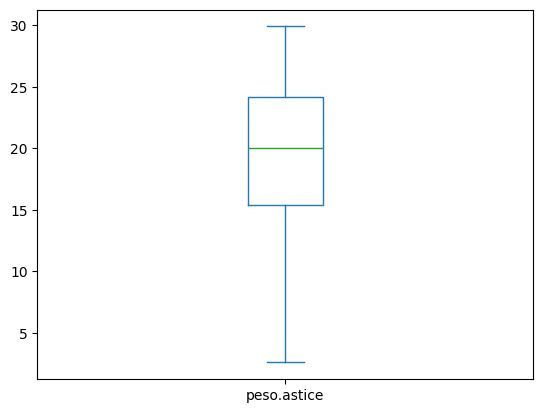

In [53]:
filastici=df[df['peso.astice']>1]['peso.astice']
filastici.plot.box()
plt.show()

In [60]:
mean=filastici.mean()

In [59]:
var=filastici.var()

In [61]:
dist=st.norm()
1-dist.cdf(0.1/var)

0.4990147381534299

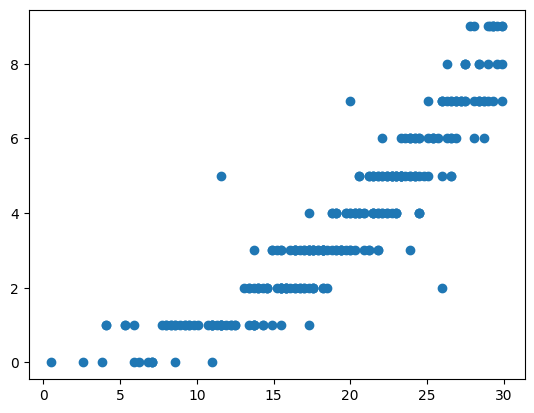

In [66]:
pesoastice=df['peso.astice']
fdm=df['forza.del.mare']
kgpesce=df['kg.di.pesce']
plt.scatter(pesoastice,fdm)
plt.show()

In [65]:
pesoastice.corr(fdm)

0.9156381240896676

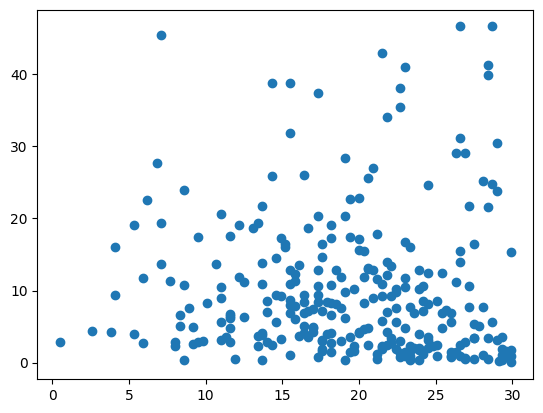

In [68]:
plt.scatter(pesoastice,kgpesce)
plt.show()

In [69]:
pesoastice.corr(kgpesce)

-0.026641767369609604

In [70]:
len(df)

281

In [72]:
import math

In [73]:
math.sqrt(281)

16.76305461424021

In [77]:
(var/math.sqrt(281))*dist.ppf(0.95)

3.973123417055326

In [78]:
1.645*(var/math.sqrt(281))

3.9734769793281037

# Esercizio 2

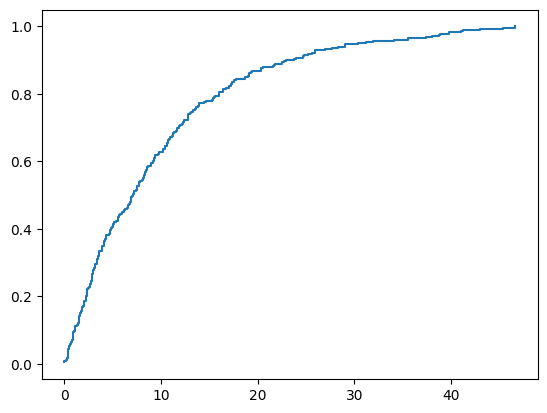

In [81]:
kgdipesce=df['kg.di.pesce']
ecdf=sm.distributions.ECDF(kgdipesce)
plt.step(ecdf.x,ecdf.y)
plt.show()

In [83]:
vatteso=kgdipesce.mean()
var=kgdipesce.var()

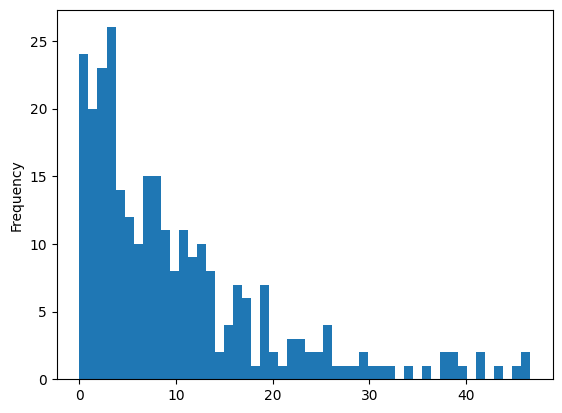

In [87]:
kgdipesce.plot.hist(bins=50)
plt.show()

In [86]:
kgdipesce

0      0.020205
1      0.300007
2      1.779424
3      0.935345
4      0.450751
         ...   
276    0.403444
277    2.703744
278    4.308614
279    4.353504
280    2.886564
Name: kg.di.pesce, Length: 281, dtype: float64